# Learning Pytorch

* [Youtube video side](https://www.youtube.com/watch?v=V_xro1bcAuA&t=40s)
* [Kode](https://www.youtube.com/redirect?event=video_description&redir_token=QUFFLUhqa1hUcDlKNFBOaVJPMHh5WTBGSUdzVm5zaHlfUXxBQ3Jtc0ttVWh5OUhGSGtON1ZyRkZJcXM3TGtrSmV6eUIyckRlQU1fX2xLVDN1VDJkMkgtVHg4QmJyUE14NjdBVzh1MGVLR01MSWV6WGVmSzhTc3JjWm9aVkV3T01TN3hua1NaWDVlUWYxUlowUGE0RGRMVjZ2SQ&q=https%3A%2F%2Fgithub.com%2Fmrdbourke%2Fpytorch-deep-learning&v=V_xro1bcAuA)
* [learnpytorch](https://www.learnpytorch.io)

In [1]:
!nvidia-smi

zsh:1: command not found: nvidia-smi


In [6]:
import torch
import pandas as pd
import numpy as np
print(torch.__version__)

1.13.0


# Tesnor

Måden at repræsenter data på. 

* Skalar tensor, 
* Vector
  * Husk at forskellen mellem dimension og shape 
* Random tensor er vigtig da Neural netværk starter med tilfældige tal men som så finder et mønster. 

In [14]:
scalar = torch.tensor(7)
vector = torch.tensor([7, 7])

random_tensro = torch.rand(3, 4)

print('Dimension af skalar \n', scalar.ndim)
print('items af skalar \n', scalar.item())

print('vector af skalar \n', vector)
print('vector af dimension \n', vector.ndim)

print('random \n', random_tensro)

Dimension af skalar 
 0
items af skalar 
 7
vector af skalar 
 tensor([7, 7])
vector af dimension 
 1
random 
 tensor([[0.3094, 0.0622, 0.5677, 0.6994],
        [0.1849, 0.3638, 0.4794, 0.6054],
        [0.7730, 0.3827, 0.9984, 0.1653]])


In [15]:
# zero
zeroas = torch.zeros(size = (3, 4))
zeroas

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

vigtig at tensor har rette type, shape og device (om cuda, cpu eller gpu)

# Pytorch workflow


In [30]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [21]:
!pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 35.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 965.4/965.4 kB 37.5 MB/s eta 0:00:00
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 46.4 MB/s eta 0:00:00a 0:00:01
  Using cached kiwisolver-1.4.4-cp39-cp39-macosx_10_9_x86_64.whl (65 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.8/240.8 kB 33.4 MB/s eta 0:00:00

[notice] A new release of pip available: 22.2 -> 22.3
[notice] To update, run: pip install --upgrade pip


# Data (preparing and loading)

Lav data *know* with used of linear regression

In [46]:
from pyparsing import srange


weights = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim=1) # unsqueeze tilføjer en dimension.
y = weights * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [25]:
len(X), len(y)

(50, 50)

In [27]:
# Splitting into 
train_split = int(0.8 * len(X))

X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(X_test)

(40, 10)

In [31]:
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = None):
    """_summary_

    Args:
        train_data (_type_, optional): _description_. Defaults to X_train.
        train_labels (_type_, optional): _description_. Defaults to y_train.
        test_data (_type_, optional): _description_. Defaults to X_test.
        test_labels (_type_, optional): _description_. Defaults to y_test.
        predictions (_type_, optional): _description_. Defaults to None.
    """
    plt.figure(figsize=(10, 7))
    plt.scatter(train_data, train_labels, c = 'b', s = 4, label = 'Training Data')
    
    plt.scatter(test_data, test_labels, c = 'g', s = 4, label = 'Test Data')
    
    if predictions != None:
        plt.scatter(test_data, predictions, c = 'r', s = 4, label = 'Predictions')
        
    plt.legend(prop = {'size': 14}); 

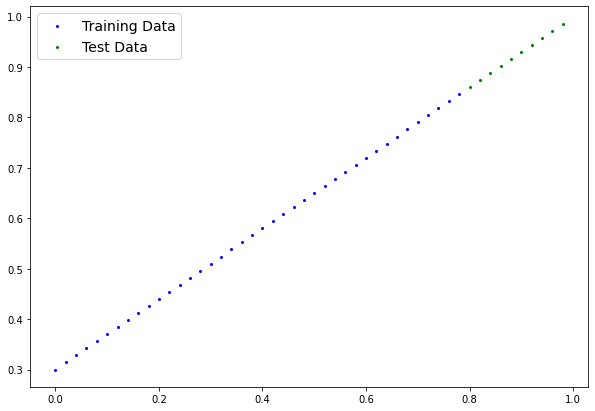

In [32]:
plot_predictions()

In [53]:
# Build model
## Laver inheriant form nn.Module. Der indeholder en masse
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, 
                                                requires_grad=True,
                                                dtype = torch.float))
        self.bias = nn.Parameter(torch.randn(1,
                                             requires_grad=True,
                                             dtype = torch.float))
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias

What is super()?

* It 



# Main classes

* torch.nn -> neruale netværk
* torch.Parameter -> ting vi vil lære
* torch.nn.Moduel -> Base klassen for alle neurale netværk. 
* torch.optim -> optimerings algoritmer.
* def forward() -> Alle nn.Module kræver vi skal overskride forward. Den definer hvad der ske ri forward beregningen.

In [40]:
torch.randn(1)

tensor([-1.1229])

In [55]:
# Se output for modellen vi har lavet

## Random seed

torch.manual_seed(42)

model_0 = LinearRegressionModel()

# Tjek parameterne
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [44]:
# List named parameter

model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [47]:
weights, bias 

(0.7, 0.3)

# Making prediction with `torch.inference_mode()`



In [59]:
# Inference mode is a content manager and is important
# We loose the tracking of other things so we can keep things faster. 

y_preds2 = model_0(X_test)
y_preds2

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], grad_fn=<AddBackward0>)

In [56]:
with torch.inference_mode():
    y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [57]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

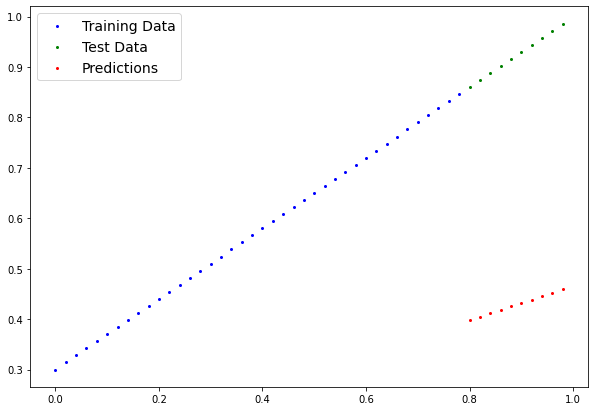

In [58]:
plot_predictions(predictions=y_preds)